<a href="https://colab.research.google.com/github/GiangTTran/SparseRandomModeDecomposition/blob/main/examples/discontinuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Discontinuous Example

Showcases the visualization tools in srmdpy on a challanging signal.

This is similar to the example shown in Section 3.1 of the [SRMD paper](https://arxiv.org/abs/2204.06108).

In [1]:
# download module from github
%pip install git+https://github.com/GiangTTran/SparseRandomModeDecomposition.git#egg=srmdpy

  Cloning https://github.com/GiangTTran/SparseRandomModeDecomposition.git to /tmp/pip-install-apc8xj3i/srmdpy_6ec740394ef443e3b4a6f3483bad1db8
  Running command git clone -q https://github.com/GiangTTran/SparseRandomModeDecomposition.git /tmp/pip-install-apc8xj3i/srmdpy_6ec740394ef443e3b4a6f3483bad1db8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


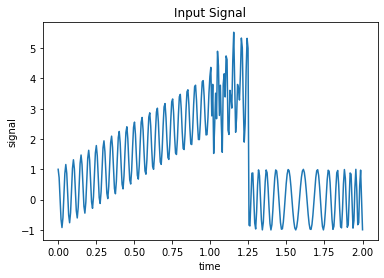

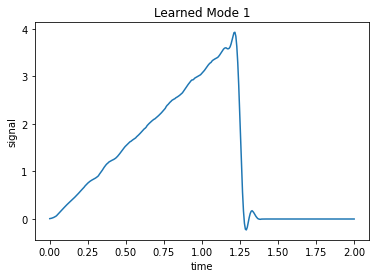

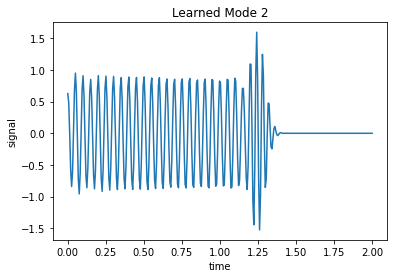

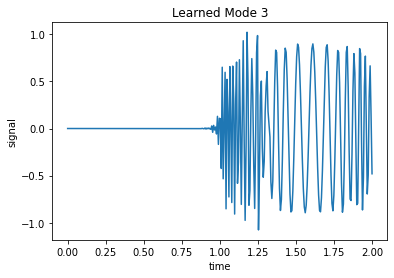

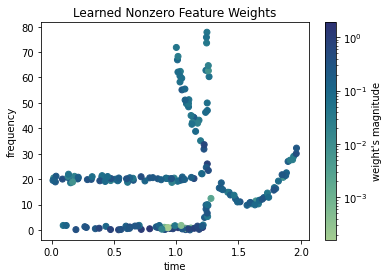

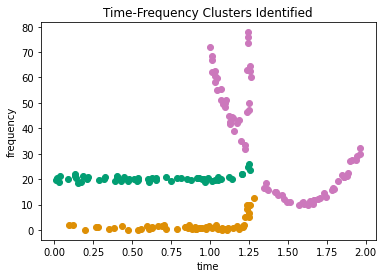

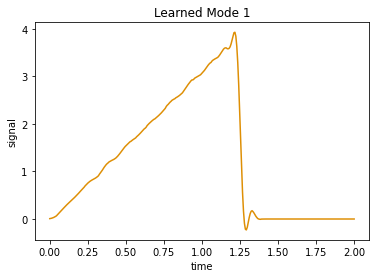

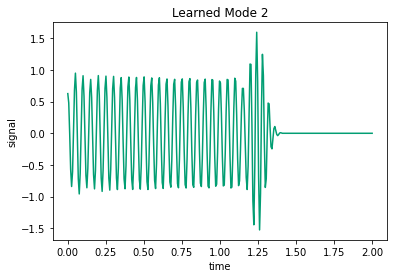

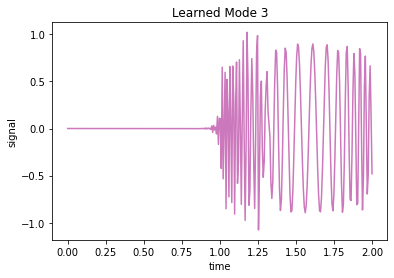

In [5]:
import numpy as np

from srmdpy import SRMD
import srmdpy.visualization as plot

twopi = 2 * np.pi

# Create signal
m = 320 # number of samples
t = np.linspace(0, 2, num=m)

domain1 = (t < 5/4)
domain2 = (1 < t)
y1 = (0.5*twopi*t) * domain1
y2 = (np.cos(20*twopi*t)) * domain1
y3 = np.cos(4/3*((twopi*t-10)**3 - (twopi-10)**3) + 10*twopi*(t-1)) * domain2

y = y1 + y2 + y3

plot.signal(t, y, title='Input Signal')

# Separate the modes
kargs = {'N_features': 50*m, 'eps':0.1, 'min_samples':3, 'r':0.06, 'n_modes':3,
         'seed':314, 'return_features':True}
modes, (tau, frq, phs), weights, labels = SRMD(y, t, **kargs)

# Plot learned modes
print('')
plot.all_modes(t, modes, title='Learned Mode')

# Plot the learned weights in time frequency space
print('')
plot.weights(tau, frq, weights, labels,
             title='Learned Nonzero Feature Weights')

# Plot the clusters and modes corresponding to those clusters
print('')
plot.modes_with_cluster(t, modes, tau, frq, labels)